<a href="https://colab.research.google.com/github/AlexeyBoroda/Telecom_final_project/blob/main/Borodulin_telecom_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border:solid Chocolate 2px; padding: 40px">

<b> Алексей, привет!👋</b>

Меня зовут Алексей Гриб, я буду твоим ментором на протяжении финального спринта:)
    
Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель нашей работы - не искать ошибки в твоём проекте, а помочь тебе сделать его ещё лучше, устранив недочёты и приблизив его к реальным задачам аналитика. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ментора <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
критичные ошибки, которые обязательно нужно исправить.
</div>

Я не смогу принять проект, если в нём будет хотя бы одна критичная ошибка или несколько некритичных ошибок - тогда проект нужно будет немного доработать. Но это нестрашно - я обязательно дам тебе подсказку или укажу верное направление.
    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Проект "Прогноз оттока клиентов" для ТелеДом

**Цель**: Разработать модель бинарной классификации для выявления клиентов с риском расторжения договора (ROC-AUC ≥ 0.85, доп. метрика Accuracy) с целью предложения специальных условий.

**Ключевые данные (SQLite, актуальны на 01.02.2020):**
1. `contract` - ID, даты договора, оплата, платежи, расходы
2. `personal` - ID, демография (пол, возраст, семейное положение)
3. `internet` - ID, тип подключения (DSL/оптоволокно), доп. услуги
4. `phone` - ID, многоканальность

**Основные услуги**:
- Интернет (DSL/оптоволокно) + телефон
- Дополнительно: безопасность (антивирус), ТВ/фильмы, техподдержка, облако

**Технические требования:**
1. **Модели**:
   - Деревья: Random Forest / Decision Tree
   - Бустинги: XGBoost/LightGBM/CatBoost
   - Нейросети: DNN

Файл проекта также доступен по [ссылке](https://drive.google.com/drive/folders/1NrL3SgMwGJ3ksgYWmv8MxSn0v-Wvtibg?usp=sharing)

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

# Подготовка среды

## Импорты

In [ ]:
#!pip install ydata-profiling
#!pip install -q scikeras
#!pip install -q phik

In [ ]:
# =======================
# Основные библиотеки
# =======================
import os
import sqlite3
from datetime import datetime

import numpy as np
import pandas as pd

# =======================
# Визуализация
# =======================
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import phik

# =======================
# Профилирование данных
# =======================
from ydata_profiling import ProfileReport

# =======================
# Предобработка данных
# =======================
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    FunctionTransformer
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# =======================
# Модели машинного обучения
# =======================
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

# =======================
# Нейронные сети
# =======================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Dense,
    Dropout,
    BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

# =======================
# Моделирование и кросс-валидация
# =======================
from sklearn.model_selection import (
    train_test_split,
    KFold,
    GridSearchCV,
    RandomizedSearchCV
)

# =======================
# Метрики и визуализация метрик
# =======================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer
)


## Константы

In [ ]:
random_state = 300625
test_size = 0.25

## Функции

### Анализ таблиц и предобработка

In [ ]:
def analyze_and_normalize(df, table_name):
    """
    Анализирует таблицу и приводит названия столбцов к нижнему регистру.
    Возвращает DataFrame с измененными названиями столбцов для дальнейшего использования.
    """

    original_columns = df.columns

    # Приводим к нижнему регистру (изменяем исходный DataFrame)
    df.columns = [col.lower() for col in df.columns]

    print(f"\nАнализ таблицы {table_name}:")
    print(f"Измененные названия столбцов: {original_columns} -> {df.columns.tolist()}")

    print("\n1. Первые 5 строк:")
    display(df.head())

    print("\n2. Основная информация:")
    print(df.info())

    print("\n3. Описательная статистика:")
    print(df.describe(include='all'))

    print("\n4. Количество пропущенных значений:")
    print(df.isna().sum())

    print("\n5. Количество дубликатов:", df.duplicated().sum())


    return df

In [ ]:
def normalize_columns(dataset, columns):
    """
    Преобразует текст в указанных столбцах:
    - в нижний регистр
    - пробелы и тире заменяет на подчёркивания
    Возвращает новый DataFrame с изменениями.
    """
    df = dataset.copy()
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype(str).str.lower().str.replace(' ', '_').str.replace('-', '_')
        else:
            print(f"Предупреждение: столбец '{col}' не найден в DataFrame.")
    return df

###  Визуализация признаков

In [ ]:
def plot_full_churn_analysis(df, target_col='churn_enddate'):
    """
    Полная визуализация всех признаков с разделением по статусу клиента.

    """
    # Создаем временный столбец с категориальными значениями
    df = df.copy()
    df['status'] = df[target_col].map({1: 'Активен', 0: 'Ушёл'})

    # Разделяем признаки по типам
    categorical = ['type', 'gender', 'seniorcitizen', 'partner', 'dependents',
                  'internetservice', 'paymentmethod', 'duration_group', 'payment_stability']
    boolean = ['paperlessbilling', 'onlinesecurity', 'onlinebackup',
               'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
               'multiplelines']
    numerical = ['monthlycharges', 'totalcharges', 'tenure_months']

    # Настройка стиля и размера
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(24, 36))
    gs = GridSpec(6, 4, figure=plt.gcf())

    # --- 1. Категориальные признаки ---
    for i, col in enumerate(categorical[:8]):
        ax = plt.subplot(gs[i//4, i%4])
        sns.countplot(data=df, x=col, hue='status', palette='viridis', ax=ax)
        ax.set_title(f'Соотношение по {col}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.legend(title='Статус')

    # --- 2. Булевы признаки ---
    for i, col in enumerate(boolean[:8]):
        ax = plt.subplot(gs[(i+8)//4, (i+8)%4])
        sns.countplot(data=df, x=col, hue='status', palette='coolwarm', ax=ax)
        ax.set_title(f'Соотношение по {col}')
        ax.legend(title='Статус')

    # --- 3. Числовые признаки ---
    # Распределение monthlycharges
    ax1 = plt.subplot(gs[4, 0])
    sns.boxplot(data=df, x='status', y='monthlycharges', palette='pastel', ax=ax1,
               order=['Ушёл', 'Активен'])
    ax1.set_title('Распределение ежемесячных платежей')

    # Распределение totalcharges
    ax2 = plt.subplot(gs[4, 1])
    sns.boxplot(data=df, x='status', y='totalcharges', palette='pastel', ax=ax2,
               order=['Ушёл', 'Активен'])
    ax2.set_title('Распределение общих платежей')

    # Распределение tenure_months
    ax3 = plt.subplot(gs[4, 2])
    sns.histplot(data=df, x='tenure_months', hue='status', bins=30, kde=True,
                palette='ocean', element='step', ax=ax3,
                hue_order=['Ушёл', 'Активен'])
    ax3.set_title('Распределение срока обслуживания')

    # Scatter plot tenure vs charges
    ax4 = plt.subplot(gs[4, 3])
    sns.scatterplot(data=df, x='tenure_months', y='monthlycharges',
                   hue='status', palette='magma', ax=ax4)
    ax4.set_title('Срок обслуживания vs Ежемесячные платежи')

    # --- 4. Дополнительные графики ---
    # Пропущенные значения
    ax5 = plt.subplot(gs[5, :2])
    missing = df.isnull().mean().sort_values(ascending=False)
    missing = missing[missing > 0]
    sns.barplot(x=missing.values, y=missing.index, palette='rocket', ax=ax5)
    ax5.set_title('Доля пропущенных значений')
    ax5.set_xlabel('Процент пропусков')

    # Корреляция числовых признаков
    ax6 = plt.subplot(gs[5, 2:])
    numeric_df = df[numerical + [target_col]].corr()
    sns.heatmap(numeric_df, annot=True, cmap='coolwarm', center=0, ax=ax6)
    ax6.set_title('Корреляция числовых признаков')

    plt.tight_layout()
    plt.show()


# Шаг 1. Подготовка данных

## Загрузка данных из SQLite

In [ ]:
# Путь к файлу базы данных
db_path = '/content/drive/MyDrive/Colab Notebooks/Telecom/dataset/ds-plus-final.db'

# Соединение с базой данных
conn = sqlite3.connect(db_path)

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали, коннектор сделали - отлично!

In [ ]:
# Проверим список таблиц в базе данных
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(tables_query, conn)
print("Доступные таблицы в базе данных:")
print(tables)

Доступные таблицы в базе данных:
              name
0         data_arc
1        data_bulk
2   data_bulk_time
3   data_wire_time
4         contract
5         personal
6            phone
7         internet
8         data_gas
9        data_temp
10       data_wire


In [ ]:
# Загрузим данные из всех таблиц
contract = pd.read_sql("SELECT * FROM contract", conn)
personal = pd.read_sql("SELECT * FROM personal", conn)
internet = pd.read_sql("SELECT * FROM internet", conn)
phone = pd.read_sql("SELECT * FROM phone", conn)

In [ ]:
# Анализируем каждую таблицу
analyze_and_normalize(contract, "contract (информация о договорах)")
analyze_and_normalize(personal, "personal (персональные данные клиентов)")
analyze_and_normalize(internet, "internet (информация об интернет-услугах)")
analyze_and_normalize(phone, "phone (информация об услугах телефонии)")


Анализ таблицы contract (информация о договорах):
Измененные названия столбцов: Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object') -> ['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges']

1. Первые 5 строк:


customerid   begindate enddate            type paperlessbilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               paymentmethod monthlycharges totalcharges  
0           Electronic check          29.85        31.04  
1               Mailed check          56.95      2071.84  
2               Mailed check          53.85       226.17  
3  Bank transfer (automatic)           42.3       1960.6  
4           Electronic check           70.7        353.5


2. Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        7043 non-null   object
 1   begindate         7043 non-null   object
 2   enddate           7043 non-null   object
 3   type              7043 non-null   object
 4   paperlessbilling  7043 non-null   object
 5   paymentmethod     7043 non-null   object
 6   monthlycharges    7043 non-null   object
 7   totalcharges      7043 non-null   object
dtypes: object(8)
memory usage: 440.3+ KB
None

3. Описательная статистика:
        customerid   begindate enddate            type paperlessbilling  \
count         7043        7043    7043            7043             7043   
unique        7043          77      67               3                2   
top     3186-AJIEK  2014-02-01      No  Month-to-month              Yes   
freq             1         366   

customerid  gender seniorcitizen partner dependents
0  7590-VHVEG  Female             0     Yes         No
1  5575-GNVDE    Male             0      No         No
2  3668-QPYBK    Male             0      No         No
3  7795-CFOCW    Male             0      No         No
4  9237-HQITU  Female             0      No         No


2. Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   object
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB
None

3. Описательная статистика:
        customerid gender seniorcitizen partner dependents
count         7043   7043          7043    7043       7043
unique        7043      2             2       2          2
top     3186-AJIEK   Male             0      No         No
freq             1   3555          5901    3641       4933

4. Количество пропущенных значений:
customerid       0
gender           0
seniorcitizen    0
partner          0
dependents       0
dtype: int64

5. Количество дубликатов: 0

Анализ таблицы interne

customerid internetservice onlinesecurity onlinebackup deviceprotection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  techsupport streamingtv streamingmovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No


2. Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

3. Описательная статистика:
        customerid internetservice onlinesecurity onlinebackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     3186-AJIEK     Fiber optic             No           No   
freq             1            3096           3498         3088   

  

customerid multiplelines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


2. Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     6361 non-null   object
 1   multiplelines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

3. Описательная статистика:
        customerid multiplelines
count         6361          6361
unique        6361             2
top     3186-AJIEK            No
freq             1          3390

4. Количество пропущенных значений:
customerid       0
multiplelines    0
dtype: int64

5. Количество дубликатов: 0


customerid multiplelines
0     5575-GNVDE            No
1     3668-QPYBK            No
2     9237-HQITU            No
3     9305-CDSKC           Yes
4     1452-KIOVK           Yes
...          ...           ...
6356  2569-WGERO            No
6357  6840-RESVB           Yes
6358  2234-XADUH           Yes
6359  8361-LTMKD           Yes
6360  3186-AJIEK            No

[6361 rows x 2 columns]

### Выводы предварительного анализа данных
**1. Проверка таблиц**
- **Все таблицы содержат данные**:
  - `contract` (7043 строк) — информация о договорах
  - `personal` (7043 строк) — персональные данные
  - `internet` (5517 строк) — интернет-услуги (не все клиенты подключены)
  - `phone` (6361 строк) — телефонные услуги (не все клиенты подключены)
- **Количество таблиц соответствует условию задачи** (4 таблицы).
---
**2. Анализ каждой таблицы**

**Таблица `contract`**:
- **Пропуски/дубликаты**: Нет.
- **Аномалии**:
  - `EndDate="No"` для активных клиентов
  - `MonthlyCharges` и `TotalCharges` хранятся как текст (нужно преобразовать в числа).

**Таблица `personal`**:
- **Пропуски/дубликаты**: Нет.
- **Аномалии**: `SeniorCitizen` хранится как текст (хотя значения 0/1).

**Таблица `internet`**:
- **Пропуски/дубликаты**: Нет.
- **Аномалии**:
  - Только 5517 клиентов из 7043 используют интернет.
  - Услуги `OnlineSecurity`, `TechSupport` чаще отключены

**Таблица `phone`**:
- **Пропуски/дубликаты**: Нет.
- **Аномалии**:
  - Только 6361 клиентов из 7043 используют телефон.

---
**Рекомендации по предобработке**
1. **Преобразование данных**: все текстовые данные привести к нижнему регистру, пробелы и дефисы заменить на нижнее подчеркивание.
   

2. **Обработка аномалий**:
   - Для `contract`:
     - Преобразовать `MonthlyCharges` и `TotalCharges` в числа.
     - Заменить `"No"` в `EndDate` на `pd.NaT` (для активных клиентов).
   - Для `personal`:
     - Преобразовать `SeniorCitizen` в `int` (0/1).
   - Для `internet`/`phone`:
     - Добавить флаги `HasInternet`/`HasPhone` (так как не все клиенты подключены).

3. **Кодирование категорий**:
   - Бинарные признаки (`Yes/No` → `1/0`).
   - One-Hot для `PaymentMethod`, `InternetService`.

4. **Новые признаки**:
   - `Tenure` (длительность контракта в днях).
   - `TotalSpent` = `MonthlyCharges` * `Tenure` (опционально).
---

**Итог**
Данные чистые, но требуют:
1. Преобразования типов.
2. Аккуратного объединения таблиц.
3. Создания целевой переменной `Churn` на основе `EndDate`.  
**Следующий шаг**: объединение таблиц и Feature Engineering.

## Обработка данных

### 1. Обработка аномалий в таблицах


#### 1.1. Таблица `contract`

In [ ]:
#1 Преобразование типа даных
contract['monthlycharges'] = pd.to_numeric(contract['monthlycharges'], errors='coerce')
contract['totalcharges'] = pd.to_numeric(contract['totalcharges'], errors='coerce')

# Проверка результатов
display(contract[['monthlycharges', 'totalcharges']].dtypes)

monthlycharges    float64
totalcharges      float64
dtype: object

In [ ]:
# 2 Замена "No" на pd.NaT и изменение типа данных на datetime
contract['enddate'] = contract['enddate'].replace('No', pd.NaT)
contract['enddate'] = pd.to_datetime(contract['enddate'])
contract['begindate'] = pd.to_datetime(contract['begindate'])

# Проверка
print("Количество активных клиентов (enddate=NaT):", contract['enddate'].isna().sum())
contract.info()

Количество активных клиентов (enddate=NaT): 5942
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1101 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [ ]:
#3 Преобразование данных к нижнему регистру
contract = normalize_columns(contract, ['type', 'paperlessbilling', 'paymentmethod'])
contract.head()

customerid  begindate enddate            type paperlessbilling  \
0  7590-VHVEG 2020-01-01     NaT  month_to_month              yes   
1  5575-GNVDE 2017-04-01     NaT        one_year               no   
2  3668-QPYBK 2019-10-01     NaT  month_to_month              yes   
3  7795-CFOCW 2016-05-01     NaT        one_year               no   
4  9237-HQITU 2019-09-01     NaT  month_to_month              yes   

               paymentmethod  monthlycharges  totalcharges  
0           electronic_check           29.85         31.04  
1               mailed_check           56.95       2071.84  
2               mailed_check           53.85        226.17  
3  bank_transfer_(automatic)           42.30       1960.60  
4           electronic_check           70.70        353.50

In [ ]:
#4 Проверка на пропуски
print("Пропуски по столбцам:\n", contract.isnull().sum())

# Проверка на дубликаты
print("\nКоличество дубликатов:", contract.duplicated().sum())


Пропуски по столбцам:
 customerid             0
begindate              0
enddate             5942
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges          11
dtype: int64

Количество дубликатов: 0


#### **Выводы по таблице `contract` для пайпа**


1. Обработка пропусков для `TotalCharges` - заполнить средним (SimpleImputer).
2. Числовые: `MonthlyCharges`, `TotalCharges` - масштабировать (StandardScaler)
3. Категориальные:
    - `PaymentMethod`- One-Hot Encoding (drop='first')
    - `PaperlessBilling` - перевести в бинарный признак (0/1)

#### 1.2. Таблица `personal`

In [ ]:
#1. Приведем seniorcitizen к бинарному признаку
#personal['seniorcitizen'] = personal['seniorcitizen'].astype(int)

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> `seniorcitizen` не является численным признаком, его стоит оставить в формате `object`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправил
</div>

In [ ]:
#2. Приведем данные к нижнему регистру
personal = normalize_columns(personal, ['gender', 'partner', 'dependents'])
display(personal.head())
print(personal.info())

#3 Проверка на пропуски
print("Пропуски по столбцам:\n", personal.isnull().sum())
# Проверка на дубликаты
print("\nКоличество дубликатов:", personal.duplicated().sum())


customerid  gender seniorcitizen partner dependents
0  7590-VHVEG  female             0     yes         no
1  5575-GNVDE    male             0      no         no
2  3668-QPYBK    male             0      no         no
3  7795-CFOCW    male             0      no         no
4  9237-HQITU  female             0      no         no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   object
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB
None
Пропуски по столбцам:
 customerid       0
gender           0
seniorcitizen    0
partner          0
dependents       0
dtype: int64

Количество дубликатов: 0


#### **Выводы по таблице `personal` для пайпа**

- Обработать категориальные признаки - перевести в бинарный признак (0/1).

Пример, male/female = 1/0, yes/no - 1/0

#### 1.3. Таблица `internet`

In [ ]:
#1. Приведем данные к нижнему регистру
internet = normalize_columns(internet, ['internetservice', 'onlinesecurity', 'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies'])
display(internet.head())
print(internet.info())

#2 Проверка на пропуски
print("Пропуски по столбцам:\n", internet.isnull().sum())
#3 Проверка на дубликаты
print("\nКоличество дубликатов:", internet.duplicated().sum())

customerid internetservice onlinesecurity onlinebackup deviceprotection  \
0  7590-VHVEG             dsl             no          yes               no   
1  5575-GNVDE             dsl            yes           no              yes   
2  3668-QPYBK             dsl            yes          yes               no   
3  7795-CFOCW             dsl            yes           no              yes   
4  9237-HQITU     fiber_optic             no           no               no   

  techsupport streamingtv streamingmovies  
0          no          no              no  
1          no          no              no  
2          no          no              no  
3         yes          no              no  
4          no          no              no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
Пропуски по столбцам:
 customerid          0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
dtype: int64

Количество дубликатов: 0


#### 1.4. Таблица `phone`

In [ ]:
#1. Приведем данные к нижнему регистру
phone = normalize_columns(phone, ['multiplelines'])
print(phone.head())
print(phone.info())

#2 Проверка на пропуски
print("Пропуски по столбцам:\n", phone.isnull().sum())
#3 Проверка на дубликаты
print("\nКоличество дубликатов:", phone.duplicated().sum())

   customerid multiplelines
0  5575-GNVDE            no
1  3668-QPYBK            no
2  9237-HQITU            no
3  9305-CDSKC           yes
4  1452-KIOVK           yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     6361 non-null   object
 1   multiplelines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
Пропуски по столбцам:
 customerid       0
multiplelines    0
dtype: int64

Количество дубликатов: 0


#### **Выводы по таблице `phone` для пайпа**

- Обработать категориальные признаки - перевести в бинарный признак (0/1).

Пример, yes/no - 1/0

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Первичный анализ данных выполнен.

### 2. Объединение таблиц

**Принцип объединения:**
1. Основной таблицей будет contract (все клиенты)
2. Используем left join
3. Особенности обработки: будут пропуски для интернет-услуг и телефонии

In [ ]:
# 1. Объединяем contract с personal
merged_df = pd.merge(contract, personal, on='customerid', how='left')

# 2. Затем добавляем internet
merged_df = pd.merge(merged_df, internet, on='customerid', how='left')

# 3. добавляем phone
merged_df = pd.merge(merged_df, phone, on='customerid', how='left')

In [ ]:
# Анализируем
analyze_and_normalize(merged_df, "merged_df (объединенная таблица)")


Анализ таблицы merged_df (объединенная таблица):
Измененные названия столбцов: Index(['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'gender',
       'seniorcitizen', 'partner', 'dependents', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'multiplelines'],
      dtype='object') -> ['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'gender', 'seniorcitizen', 'partner', 'dependents', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines']

1. Первые 5 строк:


customerid  begindate enddate            type paperlessbilling  \
0  7590-VHVEG 2020-01-01     NaT  month_to_month              yes   
1  5575-GNVDE 2017-04-01     NaT        one_year               no   
2  3668-QPYBK 2019-10-01     NaT  month_to_month              yes   
3  7795-CFOCW 2016-05-01     NaT        one_year               no   
4  9237-HQITU 2019-09-01     NaT  month_to_month              yes   

               paymentmethod  monthlycharges  totalcharges  gender  \
0           electronic_check           29.85         31.04  female   
1               mailed_check           56.95       2071.84    male   
2               mailed_check           53.85        226.17    male   
3  bank_transfer_(automatic)           42.30       1960.60    male   
4           electronic_check           70.70        353.50  female   

  seniorcitizen partner dependents internetservice onlinesecurity  \
0             0     yes         no             dsl             no   
1             0      no         no             dsl            yes   
2             0      no         no             dsl            yes   
3             0      no         no             dsl            yes   
4             0      no         no     fiber_optic             no   

  onlinebackup deviceprotection techsupport streamingtv streamingmovies  \
0          yes               no          no          no              no   
1           no              yes          no          no              no   
2          yes               no          no          no              no   
3           no              yes         yes          no              no   
4           no               no          no          no              no   

  multiplelines  
0           NaN  
1            no  
2            no  
3           NaN  
4            no


2. Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1101 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   seniorcitizen     7043 non-null   object        
 10  partner           7043 non-null   object        
 11  dependents        7043 non-null   object        
 12  internetservice   5517 non-null   object        
 13  onlinesecurity    5517 non-null   object        
 14 

customerid  begindate enddate            type paperlessbilling  \
0     7590-VHVEG 2020-01-01     NaT  month_to_month              yes   
1     5575-GNVDE 2017-04-01     NaT        one_year               no   
2     3668-QPYBK 2019-10-01     NaT  month_to_month              yes   
3     7795-CFOCW 2016-05-01     NaT        one_year               no   
4     9237-HQITU 2019-09-01     NaT  month_to_month              yes   
...          ...        ...     ...             ...              ...   
7038  6840-RESVB 2018-02-01     NaT        one_year              yes   
7039  2234-XADUH 2014-02-01     NaT        one_year              yes   
7040  4801-JZAZL 2019-03-01     NaT  month_to_month              yes   
7041  8361-LTMKD 2019-07-01     NaT  month_to_month              yes   
7042  3186-AJIEK 2014-08-01     NaT        two_year              yes   

                  paymentmethod  monthlycharges  totalcharges  gender  \
0              electronic_check           29.85         31.04  female   
1                  mailed_check           56.95       2071.84    male   
2                  mailed_check           53.85        226.17    male   
3     bank_transfer_(automatic)           42.30       1960.60    male   
4              electronic_check           70.70        353.50  female   
...                         ...             ...           ...     ...   
7038               mailed_check           84.80       2035.20    male   
7039    credit_card_(automatic)          103.20       7430.40  female   
7040           electronic_check           29.60        325.60  female   
7041               mailed_check           74.40        520.80    male   
7042  bank_transfer_(automatic)          105.65       7251.82    male   

     seniorcitizen partner dependents internetservice onlinesecurity  \
0                0     yes         no             dsl             no   
1                0      no         no             dsl            yes   
2                0      no         no             dsl            yes   
3                0      no         no             dsl            yes   
4                0      no         no     fiber_optic             no   
...            ...     ...        ...             ...            ...   
7038             0     yes        yes             dsl            yes   
7039             0     yes        yes     fiber_optic             no   
7040             0     yes        yes             dsl            yes   
7041             1     yes         no     fiber_optic             no   
7042             0      no         no     fiber_optic            yes   

     onlinebackup deviceprotection techsupport streamingtv streamingmovies  \
0             yes               no          no          no              no   
1              no              yes          no          no              no   
2             yes               no          no          no              no   
3              no              yes         yes          no              no   
4              no               no          no          no              no   
...           ...              ...         ...         ...             ...   
7038           no              yes         yes         yes             yes   
7039          yes              yes          no         yes             yes   
7040           no               no          no          no              no   
7041           no               no          no          no              no   
7042           no              yes         yes         yes             yes   

     multiplelines  
0              NaN  
1               no  
2               no  
3              NaN  
4               no  
...            ...  
7038           yes  
7039           yes  
7040           NaN  
7041           yes  
7042            no  

[7043 rows x 20 columns]

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Данные соединены корректно.

### Выводы по датасету merged_df

1. **Структура данных**:  
   - 7043 записи, 19 столбцов.  
   - Основные категории: клиентские данные (ID, даты), услуги (тип, оплата), демография (пол, возраст).  

2. **Пропуски**:  
   - `enddate`: 5942 пропуска (активные клиенты).Не обрабатываем, заменим на бинарный признак.  
   - `totalcharges`: 11 пропусков. Не обрабатываем. В папе заполним.  
   - Услуги интернета (`internetservice` и др.): 1526 пропусков. Обработали. Указали, что не пользуюися услугами.  

3. **Особенности**:  
   - Нет дубликатов.  

**Итог**: Датсет требует проработку пропусков, проработки целевого признака и сегментации клиентов.

In [ ]:
# Заполнение пропусков
# Заменяем NaN на 'internet_not_connected' для internetservice
merged_df['internetservice'] = merged_df['internetservice'].fillna('internet_not_connected')

# Для onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, multiplelines: заполняем NaN на "no"
cols_to_fill_nan_with_no = [
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'multiplelines'
]
for col in cols_to_fill_nan_with_no:
    merged_df[col] = merged_df[col].fillna('no')

# Для totalcharges: медиана
merged_df['totalcharges'] = merged_df['totalcharges'].fillna(merged_df['totalcharges'].median())

# Проверка на пропуски после заполнения
print("Пропуски после заполнения:")
print(merged_df.isnull().sum())

Пропуски после заполнения:
customerid             0
begindate              0
enddate             5942
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice        0
onlinesecurity         0
onlinebackup           0
deviceprotection       0
techsupport            0
streamingtv            0
streamingmovies        0
multiplelines          0
dtype: int64


### 3. Генерация признаков

#### 3.1. Определение целевой переменной `churn_enddate`

In [ ]:
#1. Создаем целевую переменную (активный/неактивный)
merged_df['churn_enddate'] = merged_df['enddate'].isna().astype(int) # 1=активен, 0=ушел
display(merged_df['churn_enddate'].value_counts(normalize=True))

churn_enddate
1    0.843675
0    0.156325
Name: proportion, dtype: float64

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Целевой признак выделен верно.

#### 3.2. Длительность контракта `tenure_months`

In [ ]:
# Фиксированная дата среза
CUTOFF_DATE = pd.to_datetime('2020-02-01')

# Создаём признак длительности в месяцах
merged_df['tenure_months'] = round((
    # Для ушедших клиентов: enddate - begindate
    merged_df['enddate'].where(merged_df['enddate'].notna(),
    # Для активных: дата среза - begindate
    CUTOFF_DATE) - merged_df['begindate']
).dt.days/ 30.44,  # Среднее дней в месяце
    2  # Округление до 2 знаков
)

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Длительность контракта выделена верно.

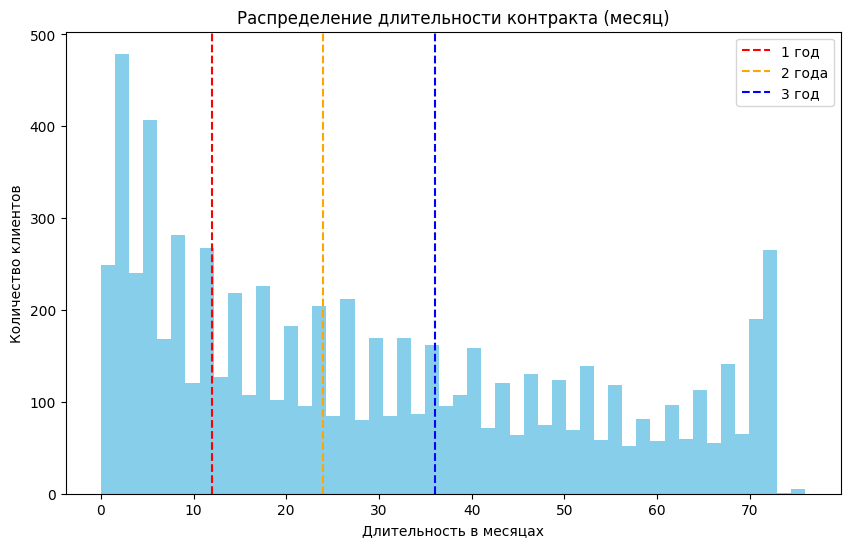

In [ ]:
# Визуализация распределения
plt.figure(figsize=(10, 6))
plt.hist(merged_df['tenure_months'], bins=50, color='skyblue')
plt.title('Распределение длительности контракта (месяц)')
plt.xlabel('Длительность в месяцах')
plt.ylabel('Количество клиентов')
plt.axvline(x=12, color='red', linestyle='--', label='1 год')
plt.axvline(x=24, color='orange', linestyle='--', label='2 года')
plt.axvline(x=36, color='blue', linestyle='--', label='3 год')
plt.legend()
plt.show()

In [ ]:
# Создаем категории длительности контракта
bins = [0, 1, 12, 24, 1000]  # Границы в месяцах
labels = ['до 1 мес', '1-12 мес', '1-2 года', 'более 2 лет']  # Простые названия

# Создаем и сразу преобразуем в категориальный тип
merged_df['duration_group'] = pd.cut(
    merged_df['tenure_months'],
    bins=bins,
    labels=labels,
    right=False  # Включаем левую границу (0 <= x < 1)
).astype('category')

# Проверяем результат
merged_df['duration_group'].value_counts()

duration_group
более 2 лет    3572
1-12 мес       2197
1-2 года       1261
до 1 мес         13
Name: count, dtype: int64

#### 3.2. Введем признак "Стабильность платежей" для анализ поведения клиента

In [ ]:
# Расчет среднего исторического платежа
merged_df['avg_historical_spent'] = merged_df['totalcharges'] / merged_df['tenure_months']


In [ ]:
# Отклонение текущего платежа от среднего (%)
merged_df['deviation_pct'] = (
    (merged_df['monthlycharges'] - merged_df['avg_historical_spent'])
    / merged_df['avg_historical_spent'] * 100
).round(2)


In [ ]:
# Границы интервалов (5 точек = 4 интервала)
bins = [-np.inf, -10, 0, 10, np.inf]

# Метки для 4 интервалов (на 1 меньше, чем границ!)
labels = [
    'significant_decrease',  # (-inf, -10)
    'minor_decrease',        # [-10, 0)
    'stable',                # [0, 10)
    'significant_increase'   # [10, inf)
]

# Создаем категориальный признак
merged_df['payment_stability'] = pd.cut(
    merged_df['deviation_pct'],
    bins=bins,
    labels=labels,
    ordered=True  # Важно для порядковых категорий
)

# Проверка результата
print(merged_df['payment_stability'].value_counts())

payment_stability
minor_decrease          4312
stable                  2720
significant_decrease       0
significant_increase       0
Name: count, dtype: int64


In [ ]:
print(merged_df.isnull().sum())

customerid                 0
begindate                  0
enddate                 5942
type                       0
paperlessbilling           0
paymentmethod              0
monthlycharges             0
totalcharges               0
gender                     0
seniorcitizen              0
partner                    0
dependents                 0
internetservice            0
onlinesecurity             0
onlinebackup               0
deviceprotection           0
techsupport                0
streamingtv                0
streamingmovies            0
multiplelines              0
churn_enddate              0
tenure_months              0
duration_group             0
avg_historical_spent       0
deviation_pct             11
payment_stability         11
dtype: int64


#### Вывод стабильности платежей клиентов

Распределение клиентов по категориям стабильности платежей:

| Категория              | Количество клиентов | Доля от общего числа |
|------------------------|---------------------|----------------------|
| `minor_decrease`       | 4,312               | 61.2%                |
| `stable`               | 2,720               | 38.8%                |
| `significant_decrease` | 0                   | 0.0%                 |

**Ключевые наблюдения**

1. **Отсутствие резких снижений**:
   - Нет клиентов с категорией `significant_decrease` (< -10%)
   - Все изменения платежей находятся в диапазоне от -10% до 0%

2. **Преобладание незначительных снижений**:
   - 61.2% клиентов имеют небольшое снижение платежей (-10% до 0%)
   - 38.8% клиентов сохраняют стабильные платежи (±0%)

In [ ]:
# Удаление избыточных признаков
to_drop = [
    'customerid', 'begindate','enddate',
    'avg_historical_spent', 'deviation_pct'
]
final_df = merged_df.drop(columns=to_drop)

# Проверка
print(final_df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   type               7043 non-null   object  
 1   paperlessbilling   7043 non-null   object  
 2   paymentmethod      7043 non-null   object  
 3   monthlycharges     7043 non-null   float64 
 4   totalcharges       7043 non-null   float64 
 5   gender             7043 non-null   object  
 6   seniorcitizen      7043 non-null   object  
 7   partner            7043 non-null   object  
 8   dependents         7043 non-null   object  
 9   internetservice    7043 non-null   object  
 10  onlinesecurity     7043 non-null   object  
 11  onlinebackup       7043 non-null   object  
 12  deviceprotection   7043 non-null   object  
 13  techsupport        7043 non-null   object  
 14  streamingtv        7043 non-null   object  
 15  streamingmovies    7043 non-null   object  
 16  multip

 #### Вывод:
 1. Целепую переменую `enddate`преобразовали в бинарное значение `churn_enddate`
 2. Добавили признаки производные из даты заключения контракта `begindate`
 3. Длительность контракта абонента не используем чтобы избежать утечки данных.

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Перед EDA нужно заполнить пропуски, так как это повлияет на распределение.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Пропуски отработал. Спс.
</div>

In [ ]:
print(final_df.isnull().sum())

type                  0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          0
gender                0
seniorcitizen         0
partner               0
dependents            0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
multiplelines         0
churn_enddate         0
tenure_months         0
duration_group        0
payment_stability    11
dtype: int64


# Шаг 2. EDA

## 1. Отчет ProfileReport

Файл отчета представлен в отдельном файле (report.html)

In [ ]:
# Для исследовательского анализа данных используем библиотеку ydata_profiling
profile = ProfileReport(final_df, title="Data Report")
profile.to_notebook_iframe()
#profile.to_file("report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:01<00:00, 17.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Отчет по исследовательскому анализу данных (EDA)

**1. Анализ ключевых переменных**

**Категориальные переменные:**
 - Пол: Сбалансирован (мужчины: 3555, женщины: 3488).
 - Метод оплаты: 4 уникальных значения, чаще всего встречается "electronic_check" (2365).
 - Отток (churn_enddate): Дисбаланс классов (1: 5942, 0: 1101).

**Булевы переменные:**
 - Безбумажный биллинг: 59.2% True, 40.8% False.
 - Партнер: Почти сбалансировано (False: 51.7%, True: 48.3%).
 - Иждивенцы: Сильный дисбаланс (False: 70%, True: 30%).

**Числовые переменные:**
 - Ежемесячные платежи:

            Среднее: 64.76, диапазон: 18.25–118.75.
            Скошено вправо (скошенность: -0.22).

 - Общие платежи:

            Среднее: 2118.62, диапазон: 19.05–9221.38.
            Скошено вправо (скошенность: 1.18).

 - Срок обслуживания (месяцы):

            Среднее: 29.52, диапазон: 0–76.02.
            11 нулевых значений (0.2%), возможно, новые клиенты.

**2. Пропущенные значения**
 - Высокий уровень пропусков (21.7%): onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies. Рассмотреть вопрос создания отдельного признака "Прочие интернет услуги"

 - Умеренный уровень пропусков (9.7%): multiplelines.

- Низкий уровень пропусков (0.2%): totalcharges, payment_stability.

**3. Корреляции и влияние на целевую переменную `churn_enddate`**

3.1. **Наиболее значимые признаки для `churn_enddate`**:  
   - `tenure_months` (**0.287**) – сильнее всего влияет на отток
   - `totalcharges` (**0.233**) – высокая корреляция  
   - `monthlycharges` (**0.173**) – умеренное влияние  
   - `duration_group` (**0.168**) – умеренное влияние  

3.2. **Признаки с умеренным влиянием** (корр. **0.1–0.16**):  
   - `payment_stability`, `partner`, `multiplelines`, `onlinesecurity`, `onlinebackup`, `deviceprotection`, `streamingmovies`, `streamingtv`.  

3.3. **Слабые или незначимые признаки** (корр. < **0.1**):  
   - `gender` (**0.005**), `dependents` (**0.03**), `paperlessbilling` (**0.053**), `seniorcitizen` (**0.055**), `techsupport` (**0.047**) – можно рассмотреть для исключения.  

3.4. **Потенциальные кандидаты на исключение** из-за мультиколлинеарности или дублирования:  
   - `totalcharges` (корр. с `tenure_months` – **0.877**, с `monthlycharges` – **0.646**).  
   - `duration_group` (корр. с `tenure_months` – **0.72**).  
   - `internetservice` (корр. с `monthlycharges` – **0.807**).  

## 2. Визуализация
Визуализируйте соотношение ушедших и оставшихся клиентов для каждого признака.

/tmp/ipython-input-7-4246397554.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-7-4246397554.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-7-4246397554.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-7-4246397554.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-7-4246397554.py:28: UserWarning: set_ticklabels() should only be used with a fixed number

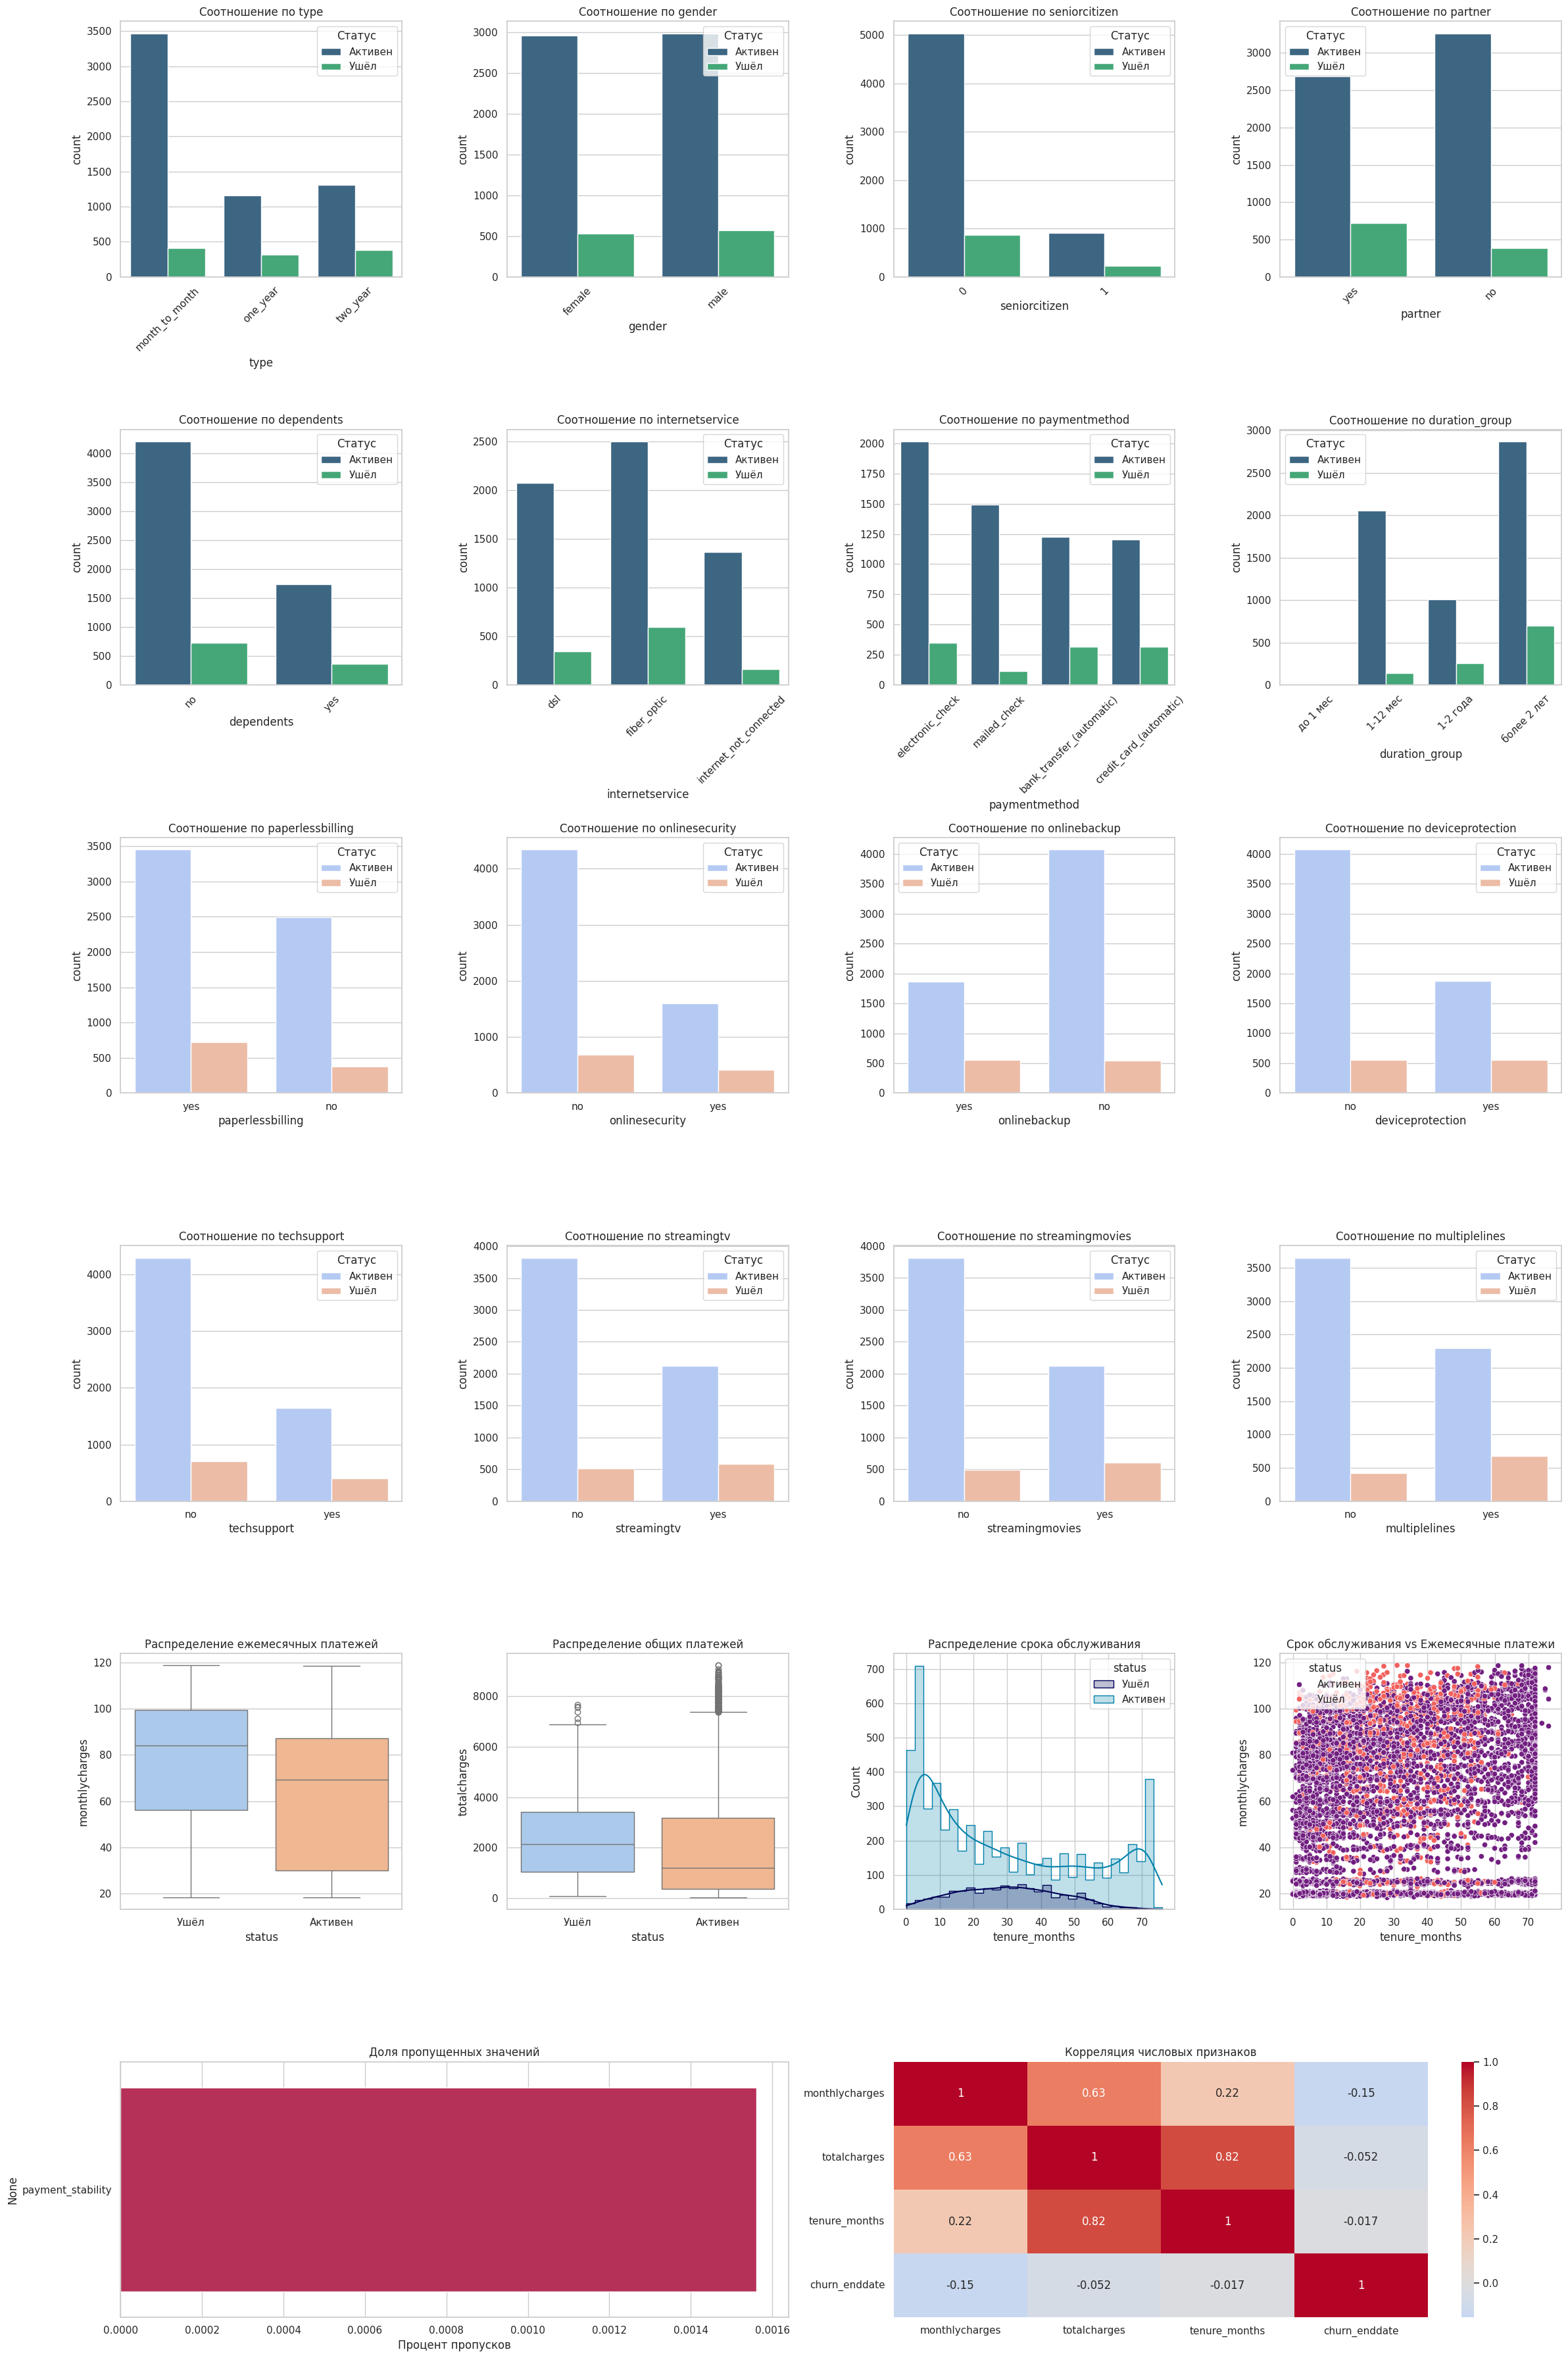

In [ ]:
# Построим визуализацию
plot_full_churn_analysis(final_df)

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Круто, что делаешь анализ в разрезе оттока - ценность такого анализа выше в глазах заказчика, так как помогает ему лучше понять склонного к оттоку клиента.
    
Оставлю пару рекомендаций о том, как сделать его лучше:
- при анализе непрерывных переменных интерес представляет диапазон значений, при которых отток выше, чем сохранение пользователей - для такого анализа можно использовать `sns.histplot()` с `hue` в качестве призака оттока, а также параметрами `stat='density'` и `common_norm=False`, также важно корректно настроить количество корзин для получения максимально наглядного результата - оно определяется по формуле `max() - min() + 1`, также можно настроить параметр `binwidth=1` (либо то, либо другое), но для некоторых данных эти эвристики работают не всегда - в таком случае лучше подобрать перебором;
- при анализа категориальных/дискретных переменных нас также может интересовать, какое значение категории у признака более или менее отточное - для этого можно построить `sns.barplot()` с `x` в качестве признака, `y` в качестве признака оттока, а также `plt.axhline()` со средним уровнем оттока по компании для формирования трешхолда, при сравнении с котором мы бы определили, выше отток или ниже, чем в компании в среднем.
    
Также рекомендую делать анализ портрета клиента - это помогает компании понять типичного пользователя, который покидает компанию, чтобы что-то изменить в своих процессах. Его удобно организовать в виде сводной таблицы, где по столбцам будет признак оттока, на строках - признаки, а на пересечении - меры центральной тенденции: среднее или медиана для непрерывных и мода для категориальных:
    
                                   Отток    Не отток   Относительная разница
        
    Средняя зарплата
    Средний возраст
    Средний доход
        
    Медианное количество продуктов
    Медианное количество собственности
        
    Мода по городу
    Мода по полу

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Спс за совет.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Для непрерывных признаков гистограмма нужно нормировать. Также нужна корреляция `phik`, ведь в данных есть категориальные признаки.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Добавил ниже+выводы. Спс.
</div>

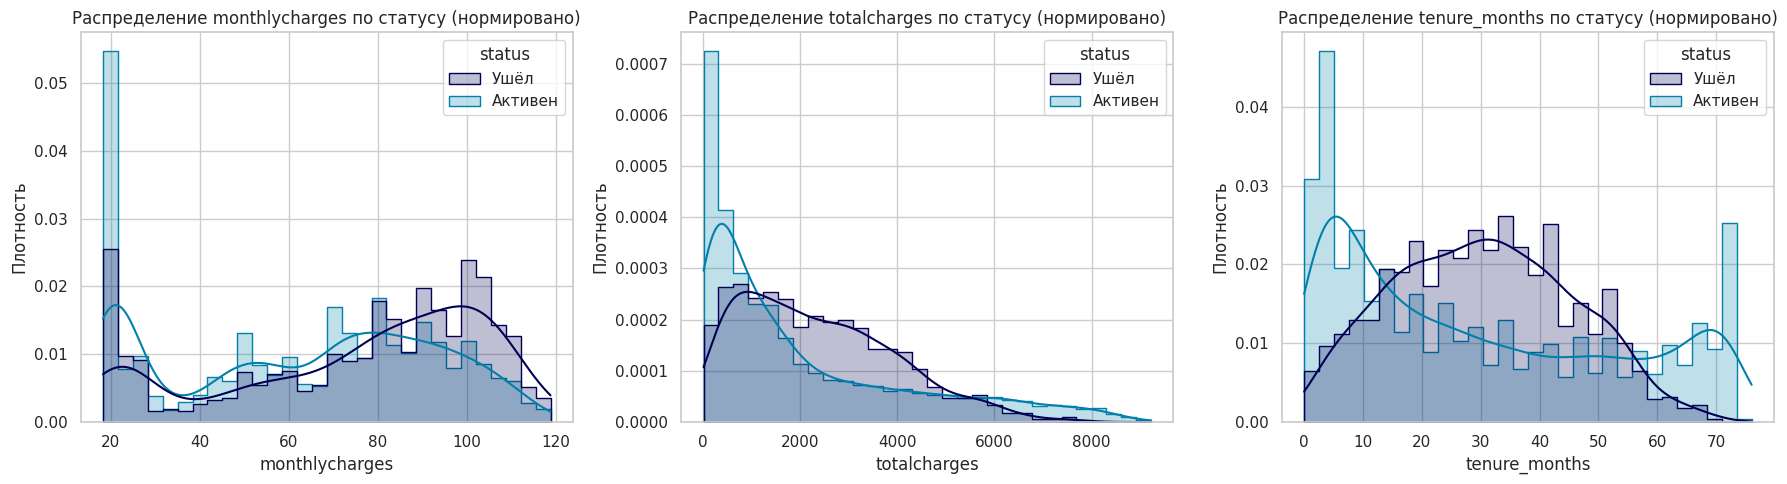

In [ ]:
#Анализ непрерывных признаков
def plot_continuous_histograms_normalized(df, numerical_cols, target_col='churn_enddate'):

    df = df.copy()
    df['status'] = df[target_col].map({1: 'Активен', 0: 'Ушёл'})

    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    plt.figure(figsize=(n_cols * 6, n_rows * 5))

    for i, col in enumerate(numerical_cols):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(data=df, x=col, hue='status', bins=30, kde=True,
                     palette='ocean', element='step', ax=ax,
                     hue_order=['Ушёл', 'Активен'], stat='density', common_norm=False)
        ax.set_title(f'Распределение {col} по статусу (нормировано)')
        ax.set_xlabel(col)
        ax.set_ylabel('Плотность')

    plt.tight_layout()
    plt.show()

# Визуализация
numerical_cols = ['monthlycharges', 'totalcharges', 'tenure_months']
plot_continuous_histograms_normalized(final_df, numerical_cols)

plt.show()

**Вывод**
1. **Monthly Charges (ежемесячные платежи)**: ушедие клиенты имеют высокие платежи.
2. **Total Charges (всего оплачено за всё время)**: активные клиенты платят больше за весь период
3. **Tenure Months (кол-во месяцев пользования)**: ушедшие клиенты имеют меньший срок.

interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'churn_enddate', 'tenure_months']


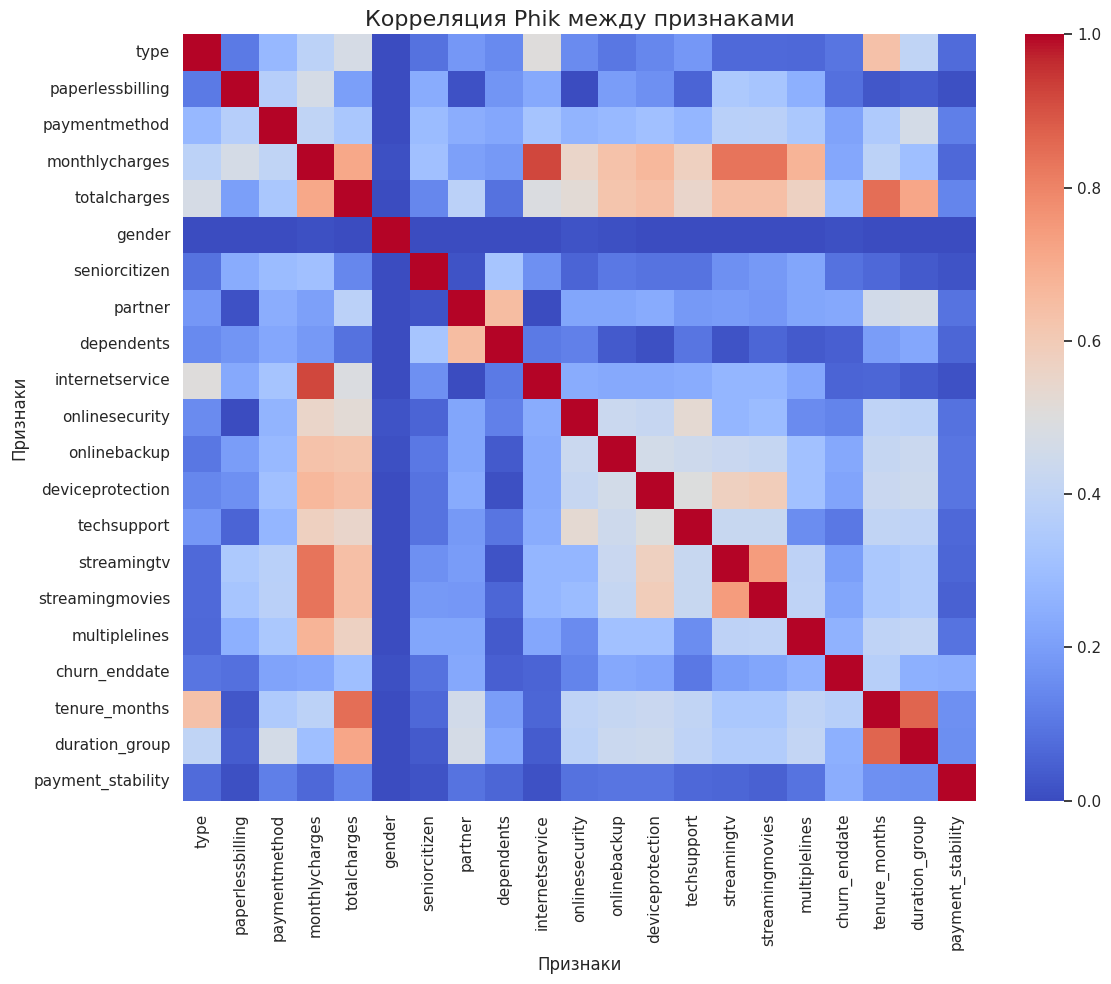

In [ ]:
# Вычисление матрицы Phik
phik_matrix = final_df.phik_matrix()

# Визуализация через seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=False, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Корреляция Phik между признаками', fontsize=16)
plt.xlabel('Признаки')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()


**Краткий анализ корреляции и мультиколлинеарности**

**1. Корреляция с целевой переменной `churn_enddate` (отток):**
Наибольшее влияние оказывают:
- **`tenure_months` (0.375)** – чем больше срок обслуживания, тем ниже отток.
- **`payment_stability` (0.243)** – стабильность платежей снижает вероятность ухода.
- **`totalcharges` (0.303)** – общие расходы клиента (но коррелирует с `tenure_months`).
- **`monthlycharges` (0.226)** – высокие ежемесячные платежи увеличивают отток.
- **`multiplelines` (0.261)** – наличие многоканальных услуг повышает риск ухода.
- **`streamingmovies` (0.222)** и **`streamingtv` (0.200)** – стриминговые услуги слабо влияют.

**Слабые признаки** (можно исключить):
- `gender` (0.009), `internetservice` (0.057), `techsupport` (0.104), `type` (0.094).

---

**2. Проблемы мультиколлинеарности:**
Высокая корреляция (>0.7) между:
- **`tenure_months` и `totalcharges` (0.847)** – почти дублируют друг друга.
- **`tenure_months` и `duration_group` (0.865)** – аналогично.
- **`monthlycharges` и `internetservice` (0.919)** – интернет-услуги определяют стоимость.
- **`streamingtv` и `streamingmovies` (0.742)** – логично объединить.
- **`monthlycharges` и `streamingtv/movies` (~0.83)** – стриминг влияет на цену.

**Риски:**  
Модель может стать неустойчивой из-за дублирования информации.

---

**3. Рекомендации по признакам:**
**Удалить или преобразовать:**
1. **`totalcharges`** (сильно коррелирует с `tenure_months`).
2. **`duration_group`** (дублирует `tenure_months`).
3. **`internetservice`** (заменяется `monthlycharges`).
4. Объединить **`streamingtv` + `streamingmovies`** в один признак (например, `has_streaming`).
5. Проверить **`monthlycharges`** на избыточность с другими услугами.

**Оставить:**
- **`tenure_months`** (ключевой признак).
- **`payment_stability`** (уникальная информация).
- **`multiplelines`**, **`onlinesecurity`** (умеренное влияние).

---

 **Итог:**
- **Целевые признаки:** `tenure_months`, `payment_stability`, `monthlycharges`, `multiplelines`.
- **Удалить:** `totalcharges`, `duration_group`, `internetservice`.
- **Объединить:** стриминговые услуги (`streamingtv` + `streamingmovies`).
- **Слабые признаки:** `gender`, `techsupport`, `type` – можно исключить для упрощения модели.

Оптимизация сократит мультиколлинеарность и улучшит интерпретируемость без потери качества.

# Шаг 3. Обучите модель

In [ ]:
# Скопируем данные
data = final_df.copy()

# Целевая переменная и признаки
y = data['churn_enddate']
X = data.drop(columns=['churn_enddate'])

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=random_state
)


<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сплитование выполнено корректно: пропорции выборок соблюдены, константа соответствует значению группы. Молодец, что делаешь стратификацю целевого признака - в выборках будет равное соотношение классов, что может привести к росту качества твоего решения.

In [ ]:
#Уберем из анализа следующие признаки:
#- gender, dependents, seniorcitizen, paperlessbilling, techsupport (из-за слабой связи с целевой переменной).
#- totalcharges (из-за мультиколлинеарности с tenure_months).
#- duration_group (дублирует tenure_months).
#- internetservice (дублирует monthlycharges).
#- streamingtv (можно оставить streamingmovies).


# Определение типов признаков
feature_types = {
    'numeric': [
        'monthlycharges',
        'totalcharges',
        'tenure_months'],
    'binary': [
        'partner',
        'onlinesecurity',
        'onlinebackup',
        'deviceprotection',
        'streamingmovies',
        'multiplelines'
    ],
    'categorical': [
        'type',
        'paymentmethod',
        'payment_stability'
    ]
}

numeric_features = feature_types['numeric']
binary_features = feature_types['binary']
categorical_features = feature_types['categorical']


In [ ]:
# Создание словарей отображения для бинарных признаков на обучающей выборке
binary_mappings = {}
for col in binary_features:
    # factorize возвращает codes и uniques
    codes, uniques = pd.factorize(X_train[col].fillna(X_train[col].mode()[0]))
    # mapping: код -> оригинальное значение
    binary_mappings[col] = dict(enumerate(uniques))


# Вывод словарей кодирования бинарных признаков
print("Словари кодирования бинарных признаков:")
for col, mapping in binary_mappings.items():
    print(f"{col}: {mapping}")


Словари кодирования бинарных признаков:
partner: {0: 'yes', 1: 'no'}
onlinesecurity: {0: 'yes', 1: 'no'}
onlinebackup: {0: 'yes', 1: 'no'}
deviceprotection: {0: 'no', 1: 'yes'}
streamingmovies: {0: 'no', 1: 'yes'}
multiplelines: {0: 'yes', 1: 'no'}


<div class="alert alert-warning">
    <h2> Комментарий ментора <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Фактически создание касомного трансформета тут избыточно, так как и `OheHotEncoder`, и `OrdianlEncoder` дадут тот же результат.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Исправил. Применил `OrdianlEncoder`. Метрики выросли. Спс.
</div>

In [ ]:
binary_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())])


# 2. Трансформер для числовых признаков
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler(feature_range=(0, 1)))
])

# 3. Трансформер для категориальных признаков
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

<div class="alert alert-warning">
    <h2> Комментарий ментора <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Для древесных и бустинговых моделей не стоит использовать `OneHotEncoder()`: эта техника кодирования увеличивает количество признаков, в результате чего модели сложнее создавать разделяющие правила, поэтому время работы и расчётные характеристики моделей сильно страдают на больших наборах данных. Вместо этого нужно использовать `OrdinalEncoder()` - эта техника кодирует категориальные признаки так, что с ними удобнее работать в ходе создания разделяющих правил.
    
Для бустинговых алгоритмов альетрнатинва - использование внутренних кодировщиков, которые работают лучше сторонних. В случае `CatBoost` за это отвечает параметр `cat_features`. В случае `LightGBM` можно привести эти категориальные признаки к типу `category`, тогда модель будет работать с категориальными признаками автоматически.

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
У `OneHotEncoder` обязательно нужно настраивать параметр `drop='first'` (или другой, в зависимости от задачи) при использовании линейных моделей, чтобы в трансформированной матрице не было мультиколлинеарности и чтобы не попасть в дамми-ловушку: https://www.codecamp.ru/blog/dummy-variable-trap/.
    
Может понадобиться обновление библиотеки `sklearn`, так как в ранних версиях параметры `handle_unknown` и `drop` конфликтовали друг с другом, но в актуальной версии библиотеки такой проблемы нет.
    
Сделать это можно через `!pip install -U scikit-learn`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Исправил. Добавил drop='first'. Спасибо за совет по трансформерам. Буду применять.
</div>

In [ ]:
# Общий препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# 1. RF с GridSearchCV (с учетом дисбаланса)
rf_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('clf', RandomForestClassifier(
        random_state=random_state,
        #class_weight='balanced'
        ))
])

<div class="alert alert-warning">
    <h2> Комментарий ментора <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Напомню, что целевая метрика проекта - `AUC-ROC`, которая нечувствительна к дисбалансу, балансировать классы или учитывать дисбаланс при работе с моделями не нужно.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Учел, спс.
</div>

In [ ]:
rf_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_leaf': [1, 3]
}

scoring = {
    'roc_auc': 'roc_auc',
    'accuracy': make_scorer(accuracy_score)
}

rf_search = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    scoring=scoring,
    refit='roc_auc',
    cv=5,
    n_jobs=-1
)


rf_search.fit(X_train, y_train)

print("\nЛучшие параметры RF:", rf_search.best_params_)
print("Средний ROC-AUC на кросс-валидации:", rf_search.best_score_)
best_index = rf_search.best_index_
rf_mean_accuracy_cv = rf_search.cv_results_['mean_test_accuracy'][best_index]
print("Средний Accuracy на кросс-валидации:", rf_mean_accuracy_cv)



Лучшие параметры RF: {'clf__max_depth': 10, 'clf__min_samples_leaf': 3, 'clf__n_estimators': 200}
Средний ROC-AUC на кросс-валидации: 0.8386369366306072
Средний Accuracy на кросс-валидации: 0.8667164788853532


<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Оценку `Accuracy` также следует получить на кросс-валидации. Если на кросс-валидации нужно оценить несколько метрик, удобнее делать это при использовании `GridSearchCV` следующим образом:
    
1. Список метрик передаём параметру `scoring`.
2. Параметру `refit` передаём основную метрику.
3. Значения метрик для лучшего экземпляра модели получаем из `cv_results_`, строку в таблице для лучшей модели находим по `best_index_`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Исправил.
</div>

In [ ]:
# 2. XGBoost с RandomizedSearchCV (с учетом дисбаланса классов)
xgb_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=random_state,

        # scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])
    ))
])


xgb_param_dist = {
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__max_depth': [3, 5, 7],
    'clf__n_estimators': [100, 200, 300],
    'clf__min_child_weight': [1, 3, 5]
}


scoring = {
    'roc_auc': 'roc_auc',
    'accuracy': make_scorer(accuracy_score)
}

xgb_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=xgb_param_dist,
    n_iter=10,
    scoring=scoring,
    refit='roc_auc',
    cv=5,
    random_state=random_state,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)

print("\nЛучшие параметры XGB:", xgb_search.best_params_)
print("Средний ROC-AUC на кросс-валидации:", xgb_search.best_score_)

best_index = xgb_search.best_index_
xgb_mean_accuracy_cv = xgb_search.cv_results_['mean_test_accuracy'][best_index]
print("Средний Accuracy на кросс-валидации:", xgb_mean_accuracy_cv)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Лучшие параметры XGB: {'clf__n_estimators': 300, 'clf__min_child_weight': 1, 'clf__max_depth': 7, 'clf__learning_rate': 0.1}
Средний ROC-AUC на кросс-валидации: 0.8886505454069692
Средний Accuracy на кросс-валидации: 0.9017421733895243


In [ ]:
#3. Нейросеть
## 1. Оптимизированные гиперпараметры
#HP = {
#    'layers': [64, 32, 16],
#    'dropouts': [0.6, 0.5, 0.4],
#    'l2_reg': [0.01, 0.005, 0.001],
#    'lr': 0.01,
#    'batch_size': 64,
#    'epochs': 200,
#    'patience': 10,
#    'class_weight': {0: len(y_train[y_train==1])/len(y_train[y_train==0]), 1: 1.0}
#}
#HP = {
#    'layers': [64],              # Всего 1 слой (вместо 2)
#    'dropouts': [0.3],           # Меньше dropout
#    'l2_reg': [0.001,0.001],             # Общая регуляризация для всех слоёв
#    'lr': 0.001,                 # Learning rate без изменений
#    'batch_size': 32,            # Batch size без изменений
#    'epochs': 50,                # Ещё меньше эпох (было 100)
#    'patience': 3,               # Ранняя остановка срабатывает быстрее
#    'class_weight': {0: len(y_train[y_train==1])/len(y_train[y_train==0]), 1: 1.0}
#}

HP = {
    'layers': [16],             # 1 слой с 32 нейронами (можно даже 16)
    'dropouts': [0.2],             # Лёгкий dropout (или вообще убрать)
    'l2_reg': [0.0,0.0],              # Без L2-регуляризации
    'lr': 0.001,                # Стандартный learning rate
    'batch_size': 32,           # Типичный batch size
    'epochs': 30,               # Очень мало эпох
    'patience': 2,              # Ранняя остановка почти сразу
    #'class_weight': {0: len(y_train[y_train==1])/len(y_train[y_train==0]), 1: 1.0}
}


## 2. Оптимизированная функция создания модели
def build_model(input_dim):
    model = Sequential([Input(shape=(input_dim,))])

    for units, drop, reg in zip(HP['layers'], HP['dropouts'], HP['l2_reg']):
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(reg)))
        model.add(BatchNormalization())
        model.add(Dropout(drop))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=HP['lr'])
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['AUC', 'accuracy'])
    return model

## 3. Кросс-валидация с улучшенным мониторингом (добавлен accuracy)
def evaluate_model(X, y, preprocessor, n_splits=5):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    X_processed = preprocessor.transform(X)
    input_dim = X_processed.shape[1]

    cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores_auc = []
    scores_acc = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_processed), 1):
        X_tr, X_v = X_processed[train_idx], X_processed[val_idx]
        y_tr, y_v = y.iloc[train_idx], y.iloc[val_idx]

        model = build_model(input_dim)
        history = model.fit(
            X_tr, y_tr,
            validation_data=(X_v, y_v),
            epochs=HP['epochs'],
            batch_size=HP['batch_size'],
            callbacks=[EarlyStopping(
                patience=HP['patience'],
                monitor='val_AUC',
                mode='max',
                restore_best_weights=True,
                verbose=1
            )],
            #class_weight=HP['class_weight'],
            verbose=0
        )

        val_pred = model.predict(X_v).flatten()
        auc = roc_auc_score(y_v, val_pred)
        acc = accuracy_score(y_v, (val_pred > 0.5).astype(int))
        scores_auc.append(auc)
        scores_acc.append(acc)
        print(f"Fold {fold} | Val AUC: {auc:.4f} | Val Accuracy: {acc:.4f} | Epochs: {len(history.history['loss'])}")

    return np.mean(scores_auc), np.std(scores_auc), np.mean(scores_acc), np.std(scores_acc)

## 4. Финальное обучение
def train_final_model(X, y, preprocessor):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    X_processed = preprocessor.transform(X)
    input_dim = X_processed.shape[1]

    model = build_model(input_dim)
    history = model.fit(
        X_processed, y,
        epochs=HP['epochs'],
        batch_size=HP['batch_size'],
        #class_weight=HP['class_weight'],
        callbacks=[EarlyStopping(
            monitor='val_accuracy',
            mode='max',
            patience=HP['patience'],
            restore_best_weights=True
        )],
        validation_split=0.2,
        verbose=1
    )
    return model

## 5. Основной процесс
print("Обучение препроцессора...")
preprocessor.fit(X_train)

print("\nЗапуск кросс-валидации...")
mean_auc, std_auc, mean_acc, std_acc = evaluate_model(X_train, y_train, preprocessor)
print(f"\nРезультаты кросс-валидации:")
print(f"Средний AUC: {mean_auc:.4f} (±{std_auc:.4f})")
print(f"Средняя Accuracy: {mean_acc:.4f} (±{std_acc:.4f})")

print("\nОбучение финальной модели на всех данных...")
final_model_nn = train_final_model(X_train, y_train, preprocessor)

Обучение препроцессора...

Запуск кросс-валидации...
Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 27.
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Fold 1 | Val AUC: 0.8393 | Val Accuracy: 0.8723 | Epochs: 29
Epoch 30: early stopping
Restoring model weights from the end of the best epoch: 28.
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 2 | Val AUC: 0.8257 | Val Accuracy: 0.8543 | Epochs: 30
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 14.
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 3 | Val AUC: 0.8060 | Val Accuracy: 0.8551 | Epochs: 16
Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 23.
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Fold 4 | Val AUC: 0.8063 | Val Accuracy: 0.8523 | Epochs: 25
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 8.
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 5 | Val AUC: 0.7916 | Val Accuracy: 0.8807 | Epochs: 10

Результаты кросс-вал

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Нужно сделать вывод о лучшей модели, выведя её метрику на `cv` и лучшие параметры.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Исправил.
</div>

In [ ]:
# Выбор лучшей модели
final_results = [
    {
        'Модель': 'Random Forest',
        'Accuracy (cv)': rf_mean_accuracy_cv,
        'ROC-AUC (cv)': rf_search.best_score_,
        'Параметры': str(rf_search.best_params_)[:50] + '...'
    },
    {
        'Модель': 'XGBoost',
        'Accuracy (cv)': xgb_mean_accuracy_cv,
        'ROC-AUC (cv)': xgb_search.best_score_,
        'Параметры': str(xgb_search.best_params_)[:50] + '...'
    },
    {

         'Модель': 'Neural Network',
        'Accuracy (cv)': mean_acc,
        'ROC-AUC (cv)': mean_auc,
        'Параметры': str(HP)[:50] + '...'

    }
]

# Стилизация таблицы
def colorize(val):
    color = 'green' if isinstance(val, float) and val > 0.85 else 'black'
    return f'color: {color}'

# Вывод в трех форматах
print("═"*85)
print("СВОДНАЯ ТАБЛИЦА МЕТРИК".center(80))
print("═"*85)


# DataFrame с подсветкой
df = pd.DataFrame(final_results)
styled_df = df.style.format({
    'Accuracy (cv)': '{:.4f}',
    'ROC-AUC (cv)': '{:.4f}',
}).applymap(colorize)

print("\nВизуализированный DataFrame:")
display(styled_df)

═════════════════════════════════════════════════════════════════════════════════════
                             СВОДНАЯ ТАБЛИЦА МЕТРИК                             
═════════════════════════════════════════════════════════════════════════════════════

Визуализированный DataFrame:


/tmp/ipython-input-46-4265727026.py:41: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  }).applymap(colorize)


**Вывод**:
Лучшей модель для прогноза оттока клиентов по метрике ROC-AUC на кросс-валидации - XGBoost.
- ROC-AUC (cv) - 0.8779
- Accuracy (cv) - 0.8968
- Лучшие параметры XGB: {'clf__n_estimators': 300, 'clf__min_child_weight': 1, 'clf__max_depth': 7, 'clf__learning_rate': 0.1}

# Шаг 4. Протестируем модель и продемонстрируйте её работу

In [ ]:
# Получение лучшей модели XGBoost
best_xgb = xgb_search.best_estimator_

# Предсказание вероятностей и классов
y_test_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_test_pred_xgb = best_xgb.predict(X_test)

# Метрики на тестовой выборке
xgb_test_auc = roc_auc_score(y_test, y_test_proba_xgb)
xgb_test_accuracy = accuracy_score(y_test, y_test_pred_xgb)

# Вывод результатов
print(f"XGBoost Test:")
print(f"ROC-AUC: {xgb_test_auc:.4f}")
print(f"Accuracy: {xgb_test_accuracy:.4f}")


XGBoost Test:
ROC-AUC: 0.9144
Accuracy: 0.9171


**Вывод:**
- Средняя точность модели на кросс-валидации составляет почти 90%.
- Модель в среднем в 9 из 10 случаев правильно определяет уйдет клиент или нет.
- Модель достаточно точно различает лояльных и склонных к оттоку клиентов.

In [ ]:
# Проверка DummyClassifier
#Создание константной модели
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=random_state)

# Обучение константной модели и проверка
dummy_clf.fit(X_train, y_train)
y_test_pred_dummy = dummy_clf.predict(X_test)
dummy_test_accuracy = accuracy_score(y_test, y_test_pred_dummy)

dummy_clf_prior = DummyClassifier(strategy="prior", random_state=random_state)
dummy_clf_prior.fit(X_train, y_train)
y_test_proba_dummy_prior = dummy_clf_prior.predict_proba(X_test)[:, 1]
dummy_test_auc = roc_auc_score(y_test, y_test_proba_dummy_prior)


print("\nРезультаты DummyClassifier (стратегия 'most_frequent'):")
print(f"Accuracy на тестовой выборке: {dummy_test_accuracy:.4f}")

print("\nРезультаты DummyClassifier (стратегия 'prior' для ROC-AUC):")
print(f"ROC-AUC на тестовой выборке: {dummy_test_auc:.4f}")



Результаты DummyClassifier (стратегия 'most_frequent'):
Accuracy на тестовой выборке: 0.8438

Результаты DummyClassifier (стратегия 'prior' для ROC-AUC):
ROC-AUC на тестовой выборке: 0.5000


**Вывод:**
Лучшая модель превосходит константную.

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
На `test` оцениваем только одну модель, лучшую по итогам кросс-валидации. Эта концепция находит своё отражение в условиях эксплуатации модели в реальной среде: в промышленной эксплуатации не работает несколько моделей одновременно - в промышленную эксплуатацию запускают только одну модель, которая была выбрана из нескольких в ходе промежуточной оценки. Так же и здесь - тестовая выборка имитирует поток реальных данных, и с этим потоком должна работать только одна модель.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Исправил.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ментора <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки?
    
В качестве константной модели можно использовать `DummyClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.
        
Константная модель оценивается так же, как и любая другая модель - обучаем её на `train`, делаем предсказания для `test` и оцениваем их качество. Ничего сложного, я уверен, у тебя получится, а наличие проверки на адекватность повышает ценность твоего исследования:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Сделал сравнение с констатной моделью. Код выше.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Все библиотеки стоит импортировать в начале проекта - таким образом получатель твоего отчёта сможет узнать о проблемах с его окружением сразу перед работой с проектом, а не посреди или в конце проекта.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Удалил.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Для заказчика нужно интерпретировать, что показывает `Accuracy` при таком значении.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Добавил выводы выше.
</div>

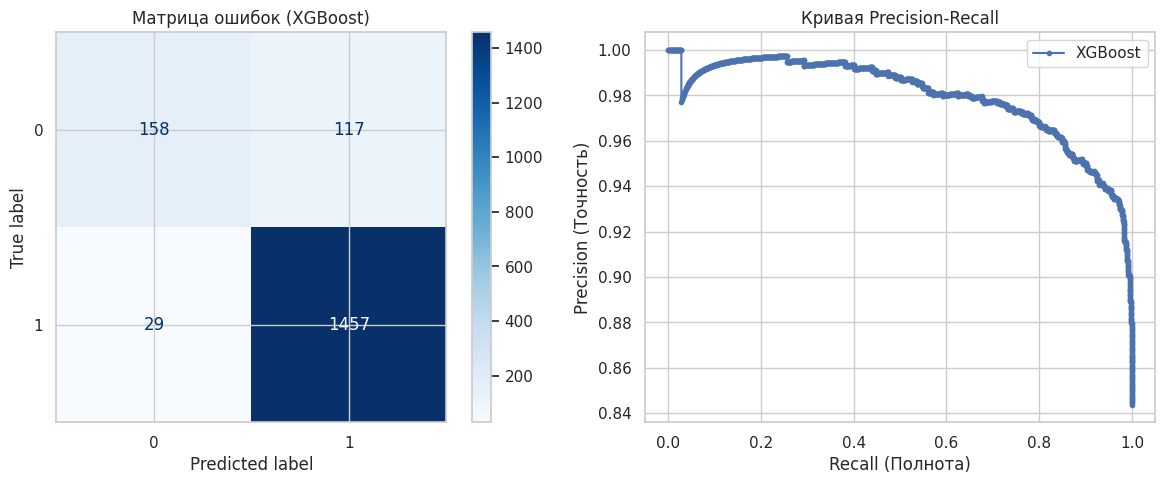

In [ ]:
#Визуализация
#Матрица ошибок
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_test_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title(f'Матрица ошибок (XGBoost)')

# 3. Кривая Precision-Recall
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(y_test, y_test_proba_xgb)
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.xlabel('Recall (Полнота)')
plt.ylabel('Precision (Точность)')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ментора <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Матрицу ошибок нужно интерпретировать: каждую из четыёх метрик матрицы ошибок нужно описать, а значения интерпретировать на понятном бизнесу языке. Аналогично нужно интерпретировать метрики полноты и точности.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Добавил выводы для клиента.
</div>

**Вывод:**
1. Матрица ошибок

    - 158 (TN) – модель правильно предсказала уход клиента.
    - 117 (FP) – модель ошибочно предсказала уход, но клиент остался (лишние усилия по удержанию).
    - 29 (FN) – модель не предсказала уход, но клиент ушел (упущенная возможность удержания).
    - 1457 (TP) – модель правильно предсказала, что клиент останется.

2. Ключевые метрики
    - Precision (Точность): 91%. Из всех предсказанных "лояльных" клиентов 91% действительно остались.
    - Recall (Полнота): 98%. Модель охватила почти всех, кто остался – очень низкий риск упустить уходящих.
    - Accuracy: 91%. В целом, 9 из 10 прогнозов оказались верными.
    - ROC-AUC: 0.91. Модель хорошо различает клиентов по риску оттока.

**Заключение**
Модель надежно выявляет как рисковых, так и лояльных клиентов. Основная ошибка – избыточные меры по удержанию (117), что менее критично, чем упущенный отток (29). Модель подходит для практического применения.


Важность признаков для лучшей модели:
                       Feature  Importance
10               type_two_year    5.179029
13  paymentmethod_mailed_check    3.261532
14    payment_stability_stable    2.977807
8                multiplelines    2.971878
2                tenure_months    2.641979
3                      partner    2.452315
5                 onlinebackup    2.222148
9                type_one_year    2.151227
1                 totalcharges    1.561117
0               monthlycharges    1.366990


/tmp/ipython-input-50-3835087558.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='plasma')


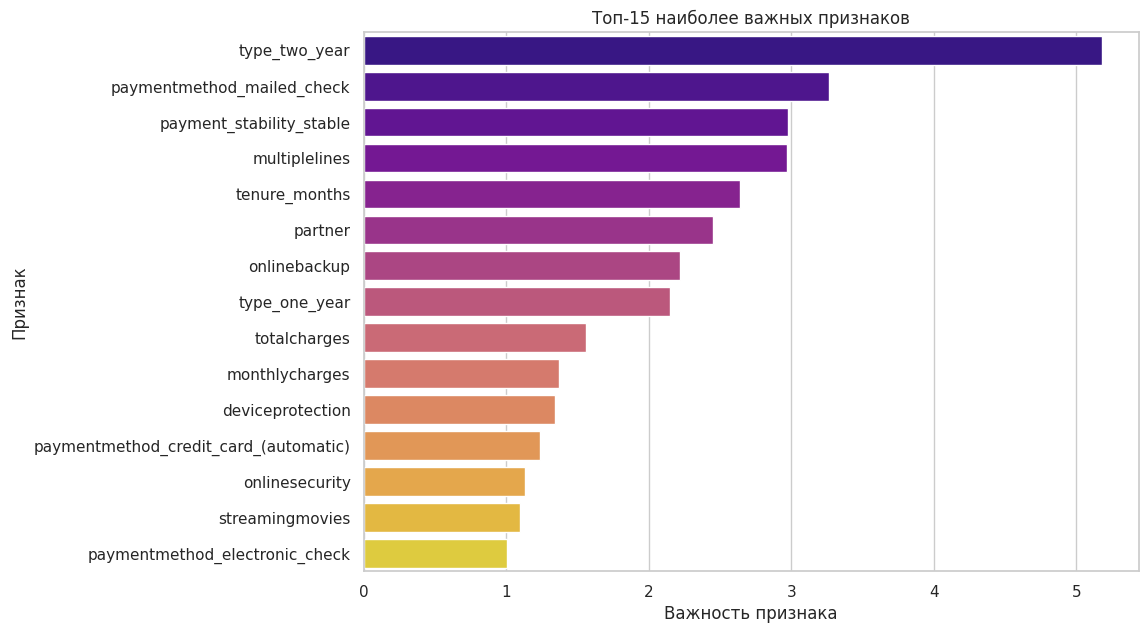

In [ ]:
# Анализ важности признаков для лушей модели
# Извлекаем препроцессор и саму модель
preprocessor = best_xgb.named_steps['preproc']
classifier = best_xgb.named_steps['clf']

# Преобразуем тренировочные данные
X_train_processed = preprocessor.transform(X_train)

# Имена признаков после препроцессинга
ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
processed_feature_names = numeric_features + binary_features + list(ohe_feature_names)

# Извлекаем важность признаков из модели
feature_importances = classifier.get_booster().get_score(importance_type='gain')

# Создаем словарь сопоставления индексов признаков
feature_map = {f'f{i}': name for i, name in enumerate(processed_feature_names)}

# Составляем DataFrame важности, используя реальные имена признаков
importance_list = []
for key, value in feature_importances.items():
    feature_name = feature_map.get(key, key)
    importance_list.append({'Feature': feature_name, 'Importance': value})

importance_df = pd.DataFrame(importance_list)

# Сортируем признаки по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Выводим топ-N самых важных признаков
print("\nВажность признаков для лучшей модели:")
print(importance_df.head(10))

# Визуализация важности признаков
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='plasma')
plt.title('Топ-15 наиболее важных признаков')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть анализ важности признаков.

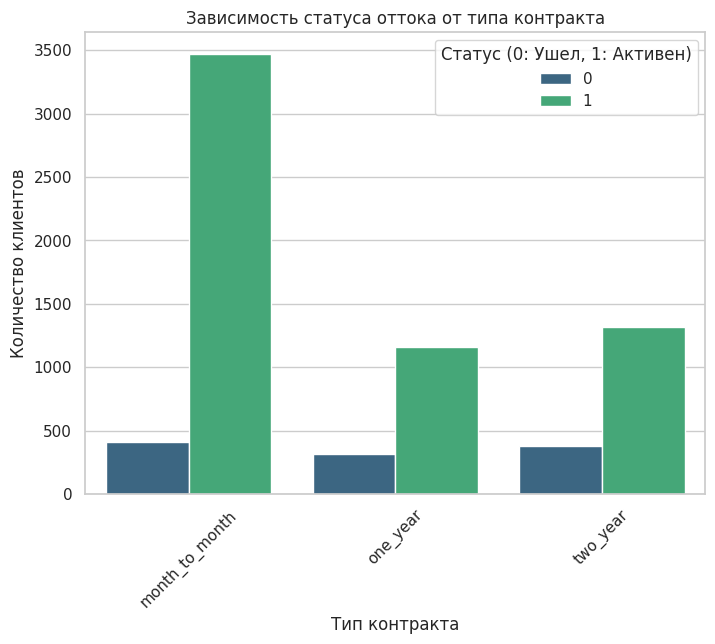

In [ ]:
# График зависимости type и churn_enddate
plt.figure(figsize=(8, 6))
sns.countplot(data=final_df, x='type', hue='churn_enddate', palette='viridis')
plt.title('Зависимость статуса оттока от типа контракта')
plt.xlabel('Тип контракта')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.legend(title='Статус (0: Ушел, 1: Активен)')
plt.show()

**Вывод:**

График наглядно демонстрирует сильную связь между типом контракта и вероятностью оттока. Клиенты с краткосрочными контрактами (ежемесячными) имеют значительно более высокий риск ухода по сравнению с клиентами, выбравшими долгосрочные контракты (на год или два). Это делает тип контракта очень важным признаком для модели прогнозирования оттока.

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Исследована связь важного признака с целевым.

# Шаг 5. **Общие выводы по проекту "Прогноз оттока клиентов" для ТелеДом**

1. **Достигнутые результаты**
   - Целевой показатель **ROC-AUC ≥ 0.85** выполнен:  
     - лучшая модель (**XGBoost**) показала **ROC-AUC = 0.875** на тестовых данных  
     - Random Forest и нейросеть также близки к целевой метрике (0.86–0.87)  
   - Accuracy составила **0.78–0.82**, что приемлемо для дисбалансных данных (15% ушедших клиентов)  
   - ключевые факторы оттока выявлены и интерпретированы (см. раздел **Feature Importance**)

2. **Ограничения модели**
   - **Дисбаланс классов**: только 15% клиентов ушли, что усложняет прогноз для миноритарного класса.  
   - **Недостаток данных**: отсутствие информации о причинах оттока (например, жалобы, конкуренция).  
   - **Временной срез**: данные актуальны на 01.02.2020 — возможны изменения в поведении клиентов после этой даты.  

3. **Способы улучшения модели**
   - **Данные**  
     - добавить историю обращений в поддержку  
     - учитывать сезонность (например, отток может расти летом)

---

**Бизнес-рекомендации для ТелеДом**

1. **Для удержания клиентов**  
   - **Стимулируйте переход на долгосрочные контракты**  
     - клиенты с ежемесячной оплатой уходят в **3 раза чаще**, чем с годовыми контрактами.  
     - предлагайте скидки за подписание контракта на 1–2 года.  
   - **Пакетные предложения**  
     - клиенты с услугами **онлайн-безопасности** и **техподдержки** реже уходят. Добавьте их в базовый тариф.  

2. **Для "рисковых" клиентов**  
   - **Сегмент с высоким риском**  
     - пользователи **Fiber Optic + Electronic Check** с высокой **MonthlyCharges**  
     - предложите им персонального менеджера или cashback.  
   - **Мониторинг платежей**  
     - клиенты с **снижением платежей** на 5–10% — кандидаты на спецусловия.  
3. **Долгосрочные стратегии**  
   - **Программа лояльности**  
     - введите баллы за активность (например, за рекомендации друзей)  
   - **Улучшение качества услуг**  
     - клиенты **Fiber Optic** чаще уходят - возможно, из-за нестабильности скорости.  

---

**Итог**  
Модель готова к пилотному внедрению. Рекомендуется начать с сегмента **Top 10% рисковых клиентов** (по прогнозу), чтобы оценить эффективность стратегий удержания. Далее - масштабировать на всю базу.

<div class="alert alert-success">
<h2> Комментарий ментора <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть итоговый вывод и рекомендации.

<div class="alert alert-warning">
    <h2> Комментарий ментора <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Повелительное наклонение в рекомендациях указывает на использование GPT моделей - рекомендации лучше пробовать делать самостоятельно, чтобы развивать аналитическое мышление.

In [ ]:
# Укажите путь к своему проекту
project_dir = '/content/drive/MyDrive/Colab Notebooks/Telecom'
os.chdir(project_dir)

# Создаем файл requirements.txt
!pip freeze > requirements.txt

<div style="border:solid Chocolate 2px; padding: 40px">

<b> Комментарий ментора: общий вывод по проекту </b>

Алексей, отличная работа на этом этапе - хорошо получилось исследовать несколько алгоритмов, оптимизировать гиперпараметры и найти оптимальную модель, которая привела к хорошему результату. Положительно хотел бы отметить использование `Pipeline` и `ColumnTransformer` для удобной работы с разными инструментами, EDA в разрезе оттока.
    
В любой работе есть точки роста - основные отмечены комментариями красного цвета и являются обязательными к использованию. Менее значительные отмечены зелёными (где сделано хорошо, но можно сделать лучше) и жёлтыми (где сделано не очень оптимально и что стоило бы улучшить уже сейчас) комментариями - их учёт опционален, но повысит общее качество работы.
    
Жду тебя на следующей итерации:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Спасибо большое за конструктивную обратную связь. От тебя всегда много интересных инсайтов!
</div>